In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
cleansed=load_amihud_markets_price()

tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:162: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:46: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:48: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:48: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:51: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

In [5]:
# I don't think I need this
sector_rtns={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_rtns[sect]=np.log(cleansed[d_map[sect]].resample(rule='m',how='last')).diff().dropna(how='all')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """


# Presentation to be like "Time Varying Liquidity and Momentum Profits (2015) paper

Rank by deciles, HML (8,9,10) - (1,2,3).  Save monthly returns (equal (risk?) weighted) and if you want to annualized then resample.


Then correlation matrix 
* Overall market vol?
* Market illiquidity (median Amihud through time series)


# Amihud (2002) Annual portfolio sorts

In [6]:
sector_zscores=sector_XS_normalized(amihud,False)

# Monthly portfolio sorts

In [10]:
sector_portfolio_sorts_mon={}
sector_portfolio_sorts_mon[s]=quantile_portfolios_monthly(sector_zscores['All'],cleansed,3)

tsmom_model.py:253: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns_monthly(rank_data.resample(rule='m',how='median'),mon,number_of_buckets,i)
/Users/mrefermat/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:3871: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  block = self.blocks[self._blknos[i]]
tsmom_model.py:260: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[next_mon].mean(axis=1)


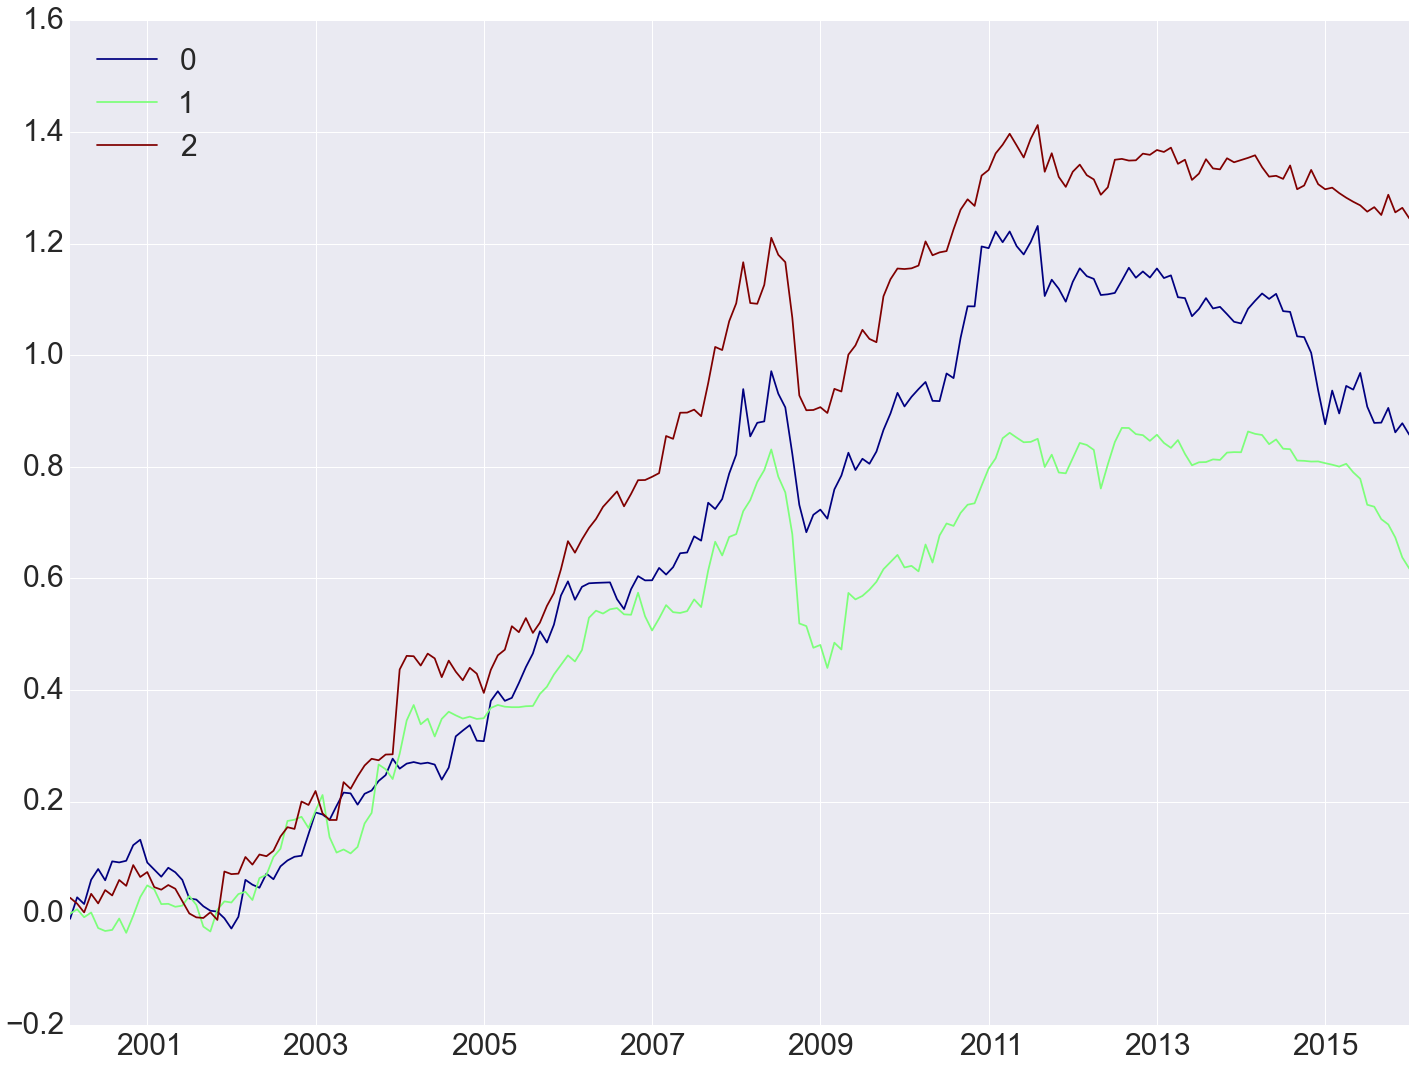

In [11]:
sector_portfolio_sorts_mon['All'].cumsum().plot(colormap='jet')

In [11]:
#for s in sector_portfolio_sorts_mon.keys():
#    sector_portfolio_sorts_mon[s].to_pickle('data/'+s+'_monthly_3_XS.pickle')


In [12]:
all_factors=pd.DataFrame()
all_factors['Amihud Monthly']=(sector_portfolio_sorts_mon['All']['2']-sector_portfolio_sorts_mon['All']['0'])

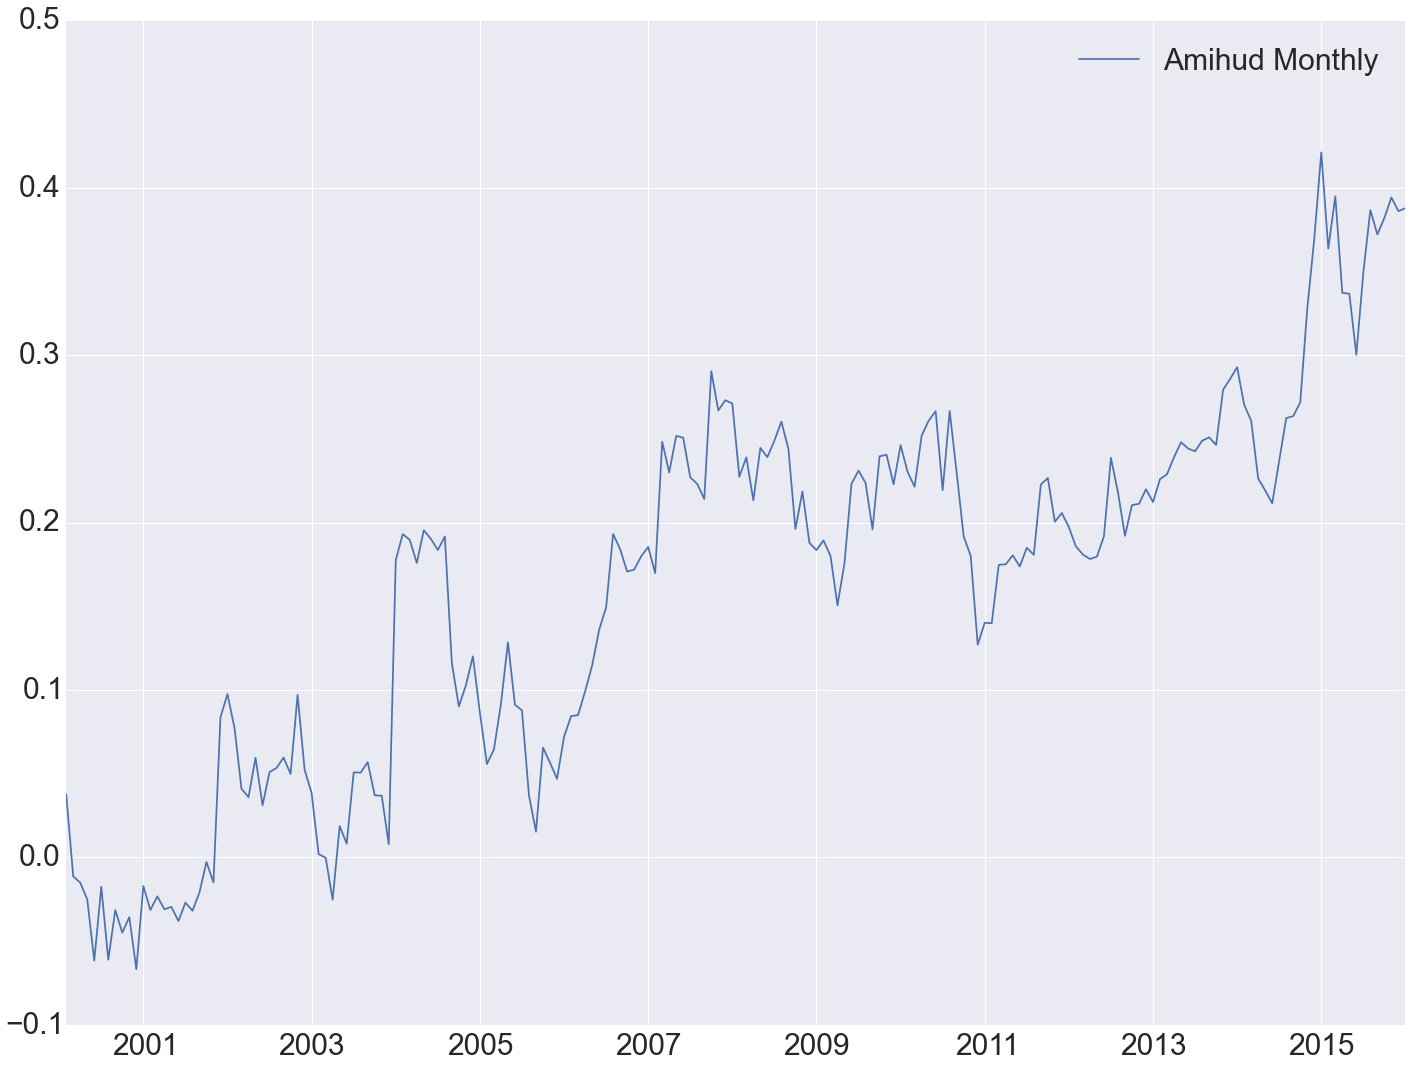

In [13]:
all_factors.cumsum().plot()

In [14]:
FHT=calculate_FHT(cleansed)
sector_zscores=sector_XS_normalized(FHT,False)

tsmom_model.py:310: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  nonzero=x[x==0].resample(rule='m',how='count')
tsmom_model.py:311: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  Z=(nonzero/x.resample(rule='m',how='count')).dropna()
tsmom_model.py:312: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
tsmom_model.py:312: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')


In [15]:
sector_portfolio_sorts_FHT_mon={}
sector_portfolio_sorts_FHT_mon[s]=quantile_portfolios_monthly(sector_zscores['All'].dropna(how='all'),cleansed,3)


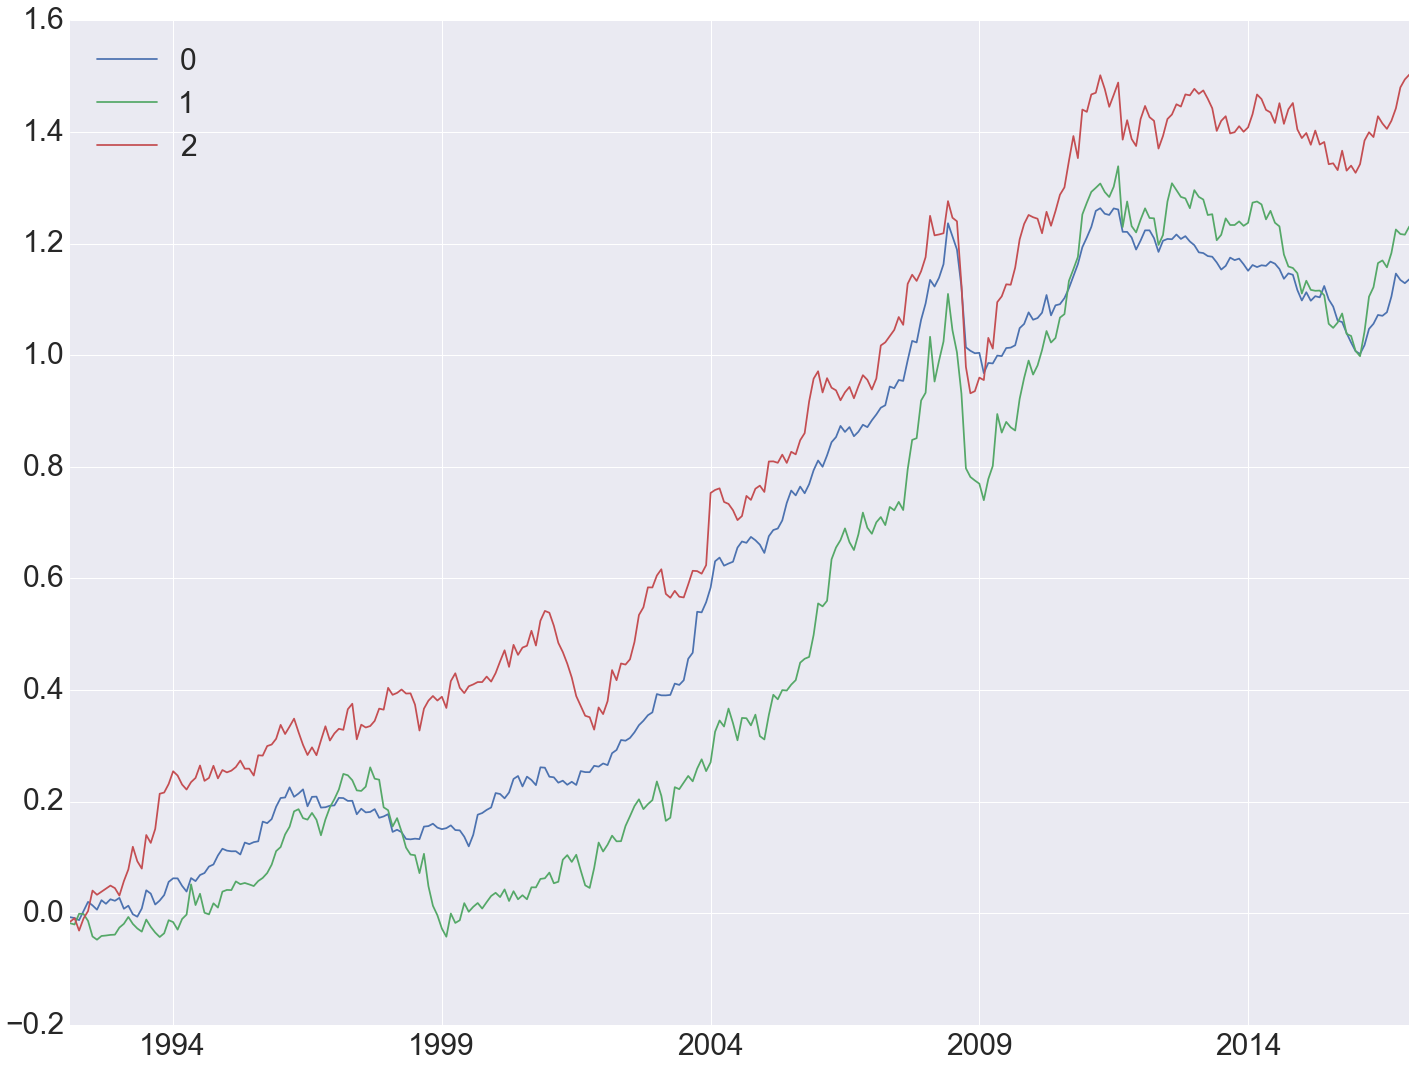

In [16]:
sector_portfolio_sorts_FHT_mon['All'].cumsum().plot()

In [28]:
#for s in sector_portfolio_sorts_FHT_mon.keys():
#    sector_portfolio_sorts_FHT_mon[s].to_pickle('data/'+s+'_monthly_FHT_3_XS.pickle')

In [17]:
all_factors['FHT Monthly']=(sector_portfolio_sorts_FHT_mon['All']['2']-sector_portfolio_sorts_FHT_mon['All']['0'])

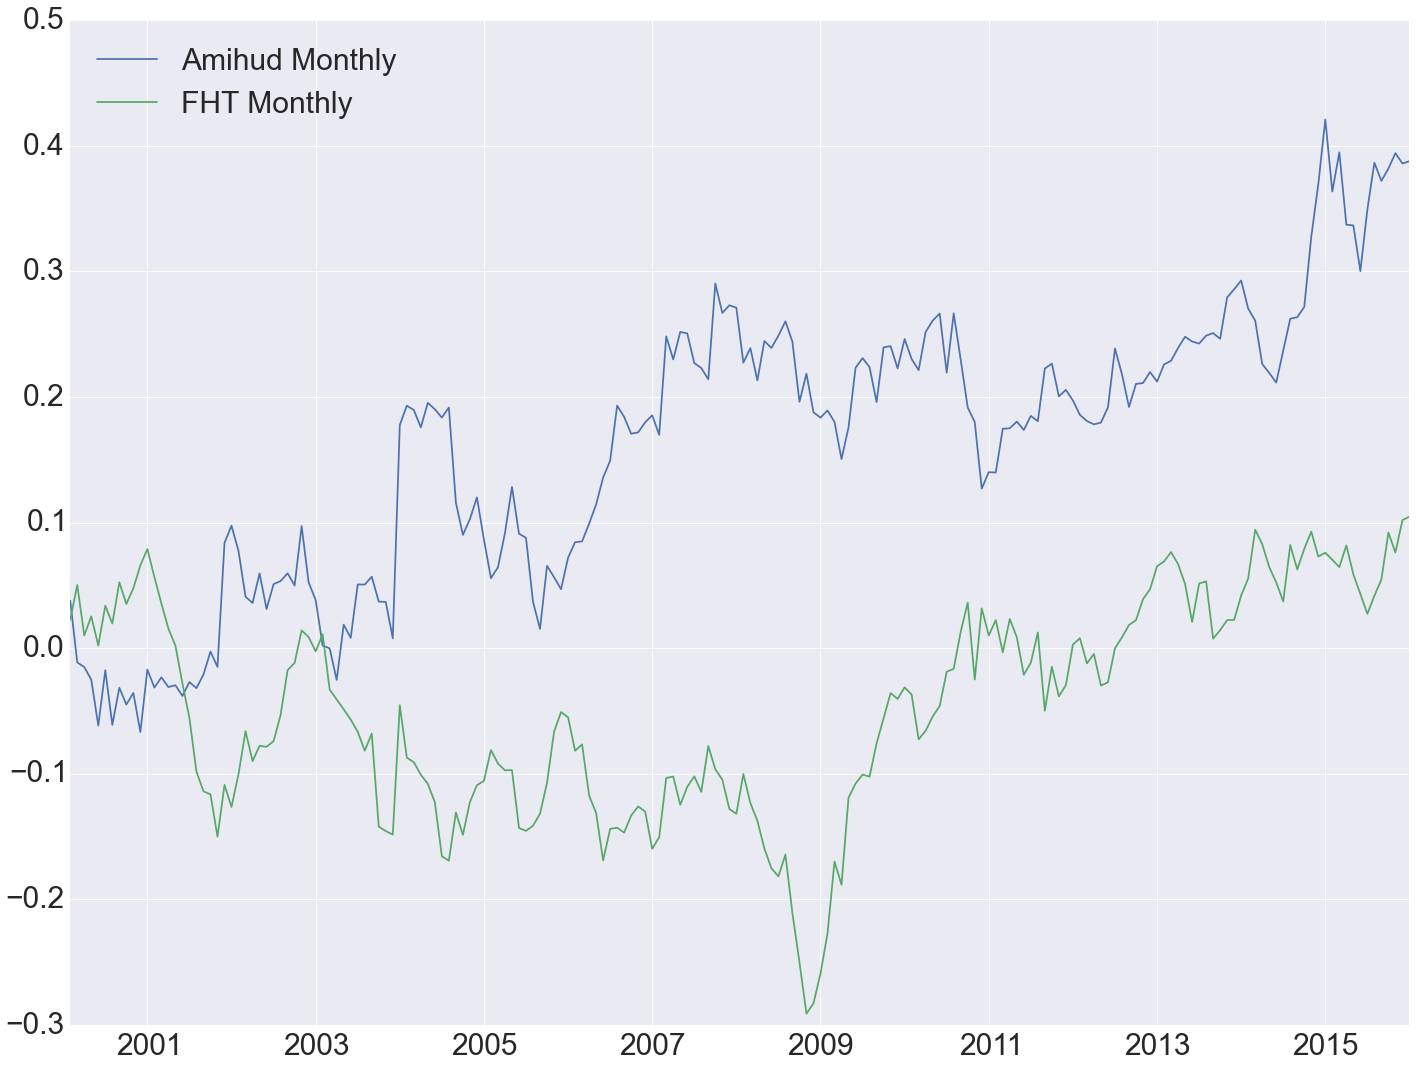

In [18]:
all_factors.cumsum().plot()

# Annual sorts

In [19]:
sector_zscores=sector_XS_normalized(amihud,False)

In [20]:
sector_portfolio_sorts={}
sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores['All'].dropna(how='all'),cleansed,3)

tsmom_model.py:240: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns(rank_data.resample(rule='a',how='median'),year,number_of_buckets,i)
tsmom_model.py:241: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].mean(axis=1)


In [21]:
factors=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors[s]=sector_portfolio_sorts[s]['2']-sector_portfolio_sorts[s]['0']

In [22]:
all_factors['Amihud Annual']=factors['All']

FHT Annual sorts

In [23]:
sector_zscores=sector_XS_normalized(FHT,False)

In [24]:
sector_portfolio_sorts={}
sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores['All'].dropna(how='all'),cleansed,3)

In [25]:
factors_FHT=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors_FHT[s]=sector_portfolio_sorts[s]['2']-sector_portfolio_sorts[s]['0']


In [26]:
#factors_FHT.cumsum().plot()


In [27]:
all_factors['FHT Annual']=factors_FHT['All']

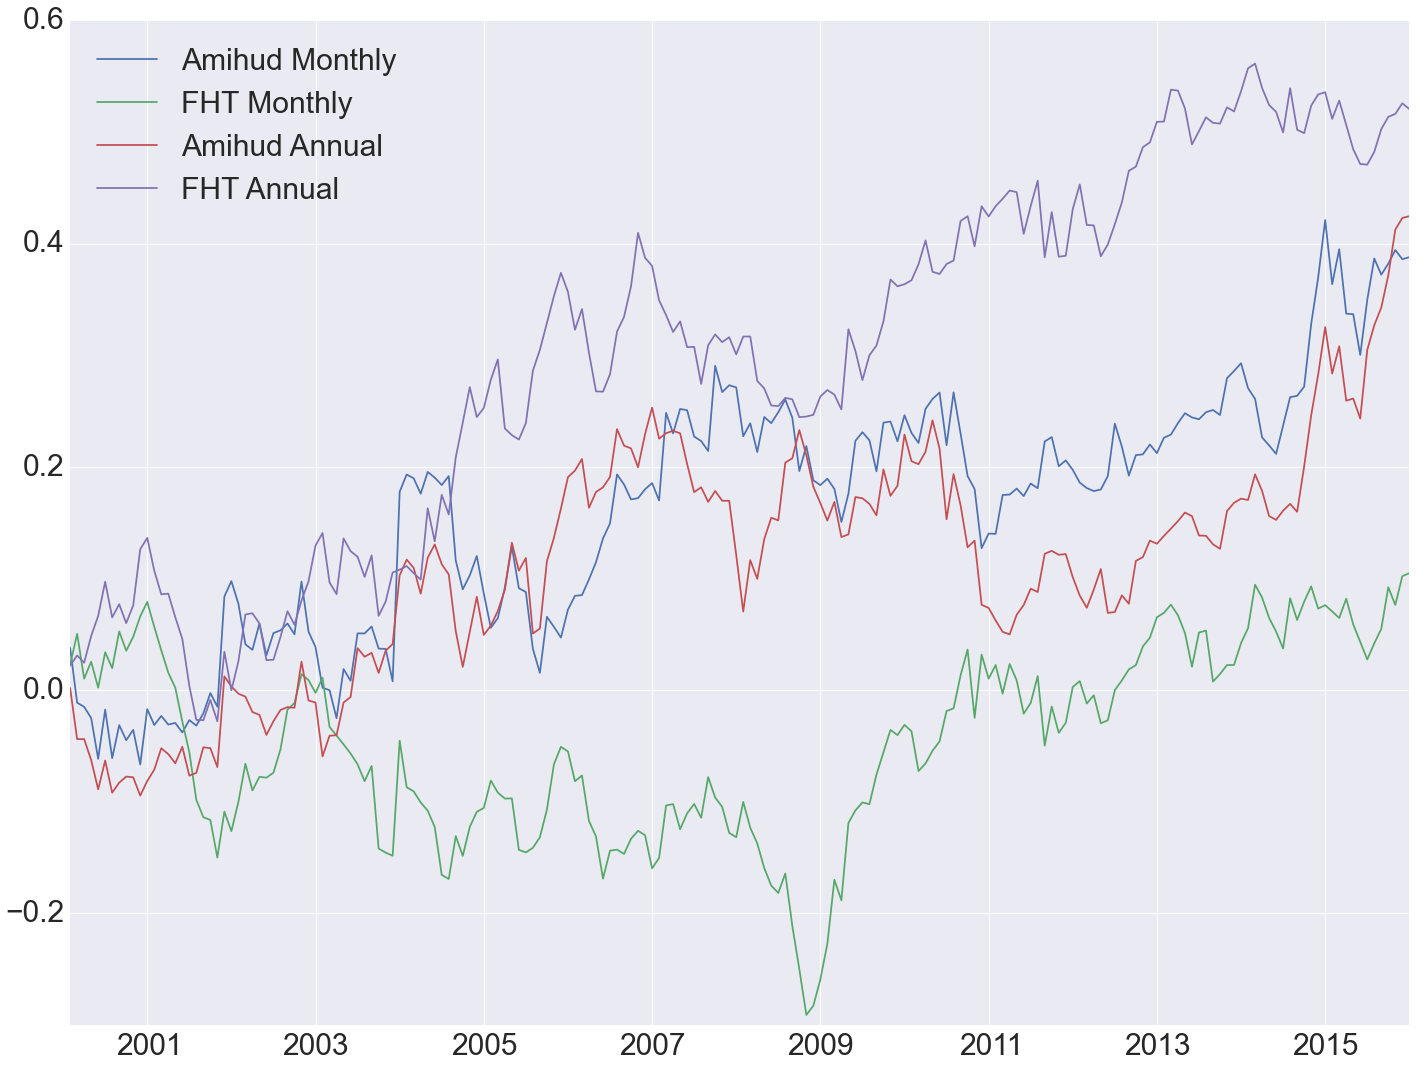

In [28]:
all_factors.cumsum().plot()

In [42]:
#all_factors.to_csv('all_market_factor_3_XS.csv')

# Run spanning test here as well

In [29]:
liquidity_factors=all_factors

In [30]:
final_res=pd.DataFrame()
r2=pd.Series()
rmse=pd.Series()
alpha={}
tstat={}
for sec in liquidity_factors.columns:
    ind=liquidity_factors.dropna().index
    reges=get_aqr_factors('All').loc[ind]
    reges['Market Return']=cleansed.resample(rule='m',how='last').pct_change().mean(axis=1).dropna()
    reges['const']=1
    
    res=sm.OLS(liquidity_factors[sec].loc[ind],reges).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    final_res[sec]=res.params
    final_res[sec+'Tstats']=res.tvalues
    r2[sec]=res.rsquared
    rmse[sec]=math.sqrt(res.mse_model)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [36]:
final_res.T.round(2)[['const', u'Market Return','VAL', u'MOM','TSMOM','CARRY' ]]

,const,Market Return,VAL,MOM,TSMOM,CARRY
Amihud Monthly,0.00,0.00,-0.29,-0.15,0.03,-0.02
Amihud MonthlyTstats,1.41,0.03,-1.90,-0.88,0.37,-0.19
FHT Monthly,-0.00,0.43,-0.15,-0.21,0.06,0.05
FHT MonthlyTstats,-0.99,4.68,-1.47,-1.63,1.11,0.53
Amihud Annual,0.00,-0.14,-0.03,0.00,0.02,-0.12
Amihud AnnualTstats,1.97,-1.46,-0.28,0.04,0.30,-1.25
FHT Annual,0.00,0.35,-0.20,-0.27,0.17,0.02
FHT AnnualTstats,0.12,4.18,-2.03,-2.65,3.63,0.21


In [39]:
print final_res.T.round(3)[['const', u'Market Return','VAL', u'MOM','TSMOM','CARRY' ]].to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  const &  Market Return &    VAL &    MOM &  TSMOM &  CARRY \\
\midrule
Amihud Monthly       &  0.003 &          0.005 & -0.289 & -0.151 &  0.031 & -0.023 \\
Amihud MonthlyTstats &  1.409 &          0.032 & -1.895 & -0.885 &  0.374 & -0.190 \\
FHT Monthly          & -0.002 &          0.435 & -0.147 & -0.207 &  0.055 &  0.052 \\
FHT MonthlyTstats    & -0.986 &          4.678 & -1.472 & -1.632 &  1.107 &  0.531 \\
Amihud Annual        &  0.004 &         -0.138 & -0.031 &  0.005 &  0.020 & -0.122 \\
Amihud AnnualTstats  &  1.967 &         -1.458 & -0.276 &  0.042 &  0.300 & -1.254 \\
FHT Annual           &  0.000 &          0.353 & -0.200 & -0.275 &  0.169 &  0.019 \\
FHT AnnualTstats     &  0.125 &          4.183 & -2.030 & -2.650 &  3.633 &  0.210 \\
\bottomrule
\end{tabular}



In [32]:
df=pd.DataFrame()
df['R2']=(r2*100).round(2)
df['rmse']=rmse.round(3)

In [33]:
df

,R2,rmse
Amihud Monthly,1.84,0.025
FHT Monthly,22.91,0.075
Amihud Annual,4.16,0.032
FHT Annual,19.41,0.066


In [38]:
print df.to_latex()

\begin{tabular}{lrr}
\toprule
{} &     R2 &   rmse \\
\midrule
Amihud Monthly &   1.84 &  0.025 \\
FHT Monthly    &  22.91 &  0.075 \\
Amihud Annual  &   4.16 &  0.032 \\
FHT Annual     &  19.41 &  0.066 \\
\bottomrule
\end{tabular}

